In [ ]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
image_exts = ['jpeg', 'jpg', 'png']

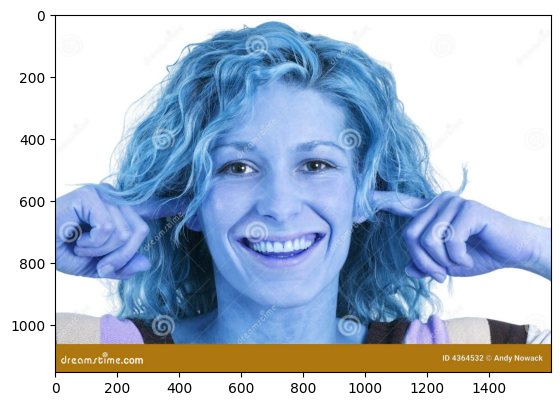

In [ ]:
image_exts[2]
data_dir = 'data'
example_img = os.listdir(os.path.join(data_dir, 'happy'))[18]
example_img_path = os.path.join(data_dir, 'happy', example_img)
example_img = cv2.imread(example_img_path)
plt.imshow(example_img)

In [ ]:
for img_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, img_class)):
    img_path = os.path.join(data_dir, img_class, image)
    try:
      img = cv2.imread(img_path)
      tip = imghdr.what(img_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(img_path))
        os.remove(img_path)
    except Exception as e:
      print("Issue with image {}".format(img_path))



Image not in ext list data/happy/29959271870_b60ac307e5.jpg
Image not in ext list data/happy/win-winning-success-happy-man-260nw-2435443779.jpg
Image not in ext list data/happy/1200px-Rita_Hayworth_1940s.jpg
Image not in ext list data/happy/Bar-poeple.webp
Image not in ext list data/happy/68132555-smiling-faces-happy-group-of-multiethnic-people-men-and-women.jpg
Image not in ext list data/happy/Salvador-Dali.jpg
Image not in ext list data/happy/ces-with-various-emotions-crayon-drawing-style-different-colorful-1897112347.jpg
Image not in ext list data/happy/portrait-beautiful-young-girl-poncho-260nw-1141825730.jpg
Image not in ext list data/happy/ing-of-young-happy-male-and-female-managers-celebrating-their-job-1862326858.jpg
Image not in ext list data/happy/220px-Anne_Hathaway-68211_28cropped_229.jpg
Image not in ext list data/sad/depressed-sad-young-woman-sitting-260nw-2355353189.jpg
Image not in ext list data/sad/many-sad-faces-our-group-260nw-51922987(1).jpg
Image not in ext list da

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 995 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
batch[0].shape

(32, 256, 256, 3)

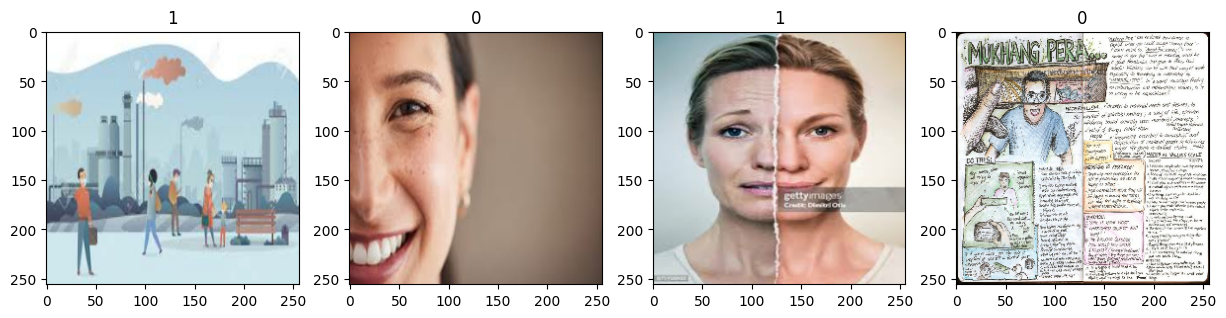

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(15,15))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
scaled_data = data.as_numpy_iterator()

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = len(data) - train_size - val_size
assert len(data) == train_size + val_size + test_size

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size +val_size).take(test_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential([
    Conv2D(16, kernel_size=3, strides=(1,1), activation='relu', input_shape=(256,256, 3)),
    MaxPooling2D(),
    Conv2D(32, kernel_size=3, strides=(1,1), activation='relu', input_shape=(256,256, 3)),
    MaxPooling2D(),
    Conv2D(16, kernel_size=3, strides=(1,1), activation='relu', input_shape=(256,256, 3)),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(2, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,882 (14.10 MB)

 Trainable params: 3,696,882 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.7903 - loss: 0.6522 - val_accuracy: 0.7865 - val_loss: 0.5053
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.8237 - loss: 0.4541 - val_accuracy: 0.8073 - val_loss: 0.4274
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.8584 - loss: 0.3675 - val_accuracy: 0.8125 - val_loss: 0.4504
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.8667 - loss: 0.3426 - val_accuracy: 0.8177 - val_loss: 0.4128
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.8930 - loss: 0.2928 - val_accuracy: 0.8802 - val_loss: 0.3093
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.9138 - loss: 0.2417 - val_accuracy: 0.8542 - val_loss: 0.3551
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.9438 - loss: 0.1974 - val_accuracy: 0.9115 - val_loss: 0.2817
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.9641 - loss: 0.1184 - val_accuracy: 0.9167 - val_loss:

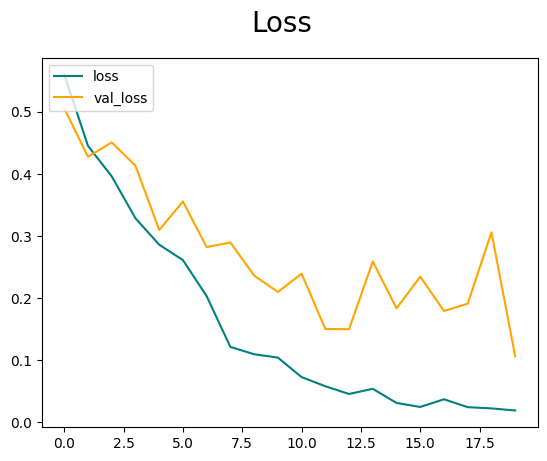

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color = 'orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

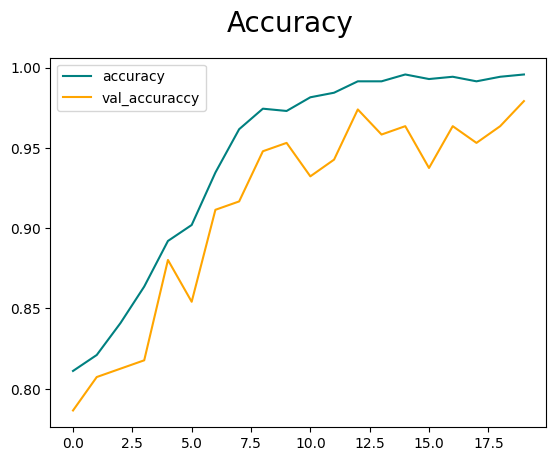

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuraccy')
plt.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()


In [ ]:
len(test)

4

In [ ]:

for batch in test.as_numpy_iterator():
    x, y = batch
    y_hat = model.predict(x)
    y_hat = np.argmax(y_hat, axis=1)

    # Update states
    pre.update_state(y, y_hat)
    re.update_state(y, y_hat)
    acc.update_state(y, y_hat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.9753086566925049, Recall: 1.0, Accuracy: 1.0


In [ ]:
img = cv2.imread('happy_test.jpg')


In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()


In [ ]:

batch = np.expand_dims(resize/255, 0)
print(resize.shape)
print(batch.shape)

In [ ]:
y = model.predict(batch)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

print(f'Output: {y}')

predicted_class = np.argmax(y)
confidence = y[0]

class_names = ['Happy', 'Sad', 'Neutral']

print(f'Predicted: {class_names[predicted_class]}')
print('Confidence percentages:')
for i, conf in enumerate(confidence):
    print(f'{class_names[i]}: {conf * 100:.2f}%')

In [ ]:
img = cv2.imread('sad_test.jpg')

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:

batch = np.expand_dims(resize/255, 0)
print(resize.shape)
print(batch.shape)

In [ ]:
y = model.predict(batch)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

print(f'Output: {y}')

predicted_class = np.argmax(y)
confidence = y[0]

class_names = ['Happy', 'Sad', 'Neutral']

print(f'Predicted: {class_names[predicted_class]}')
print('Confidence percentages:')
for i, conf in enumerate(confidence):
    print(f'{class_names[i]}: {conf * 100:.2f}%')